# DSC540 Term Project

Jackson Aquino

## Contents

1. [Milestone 1: Project Plan](#Milestone-1:-Project-Plan)
2. [Milestone 2: Cleaning the CSV file](#Milestone-2:-Cleaning-the-CSV-file)
    *  [Importing the data](#Importing-the-data)
    *  [Transformation 1](#1st-transformation:-Clean-the-currency-column-to-get-only-the-currency-code)
    *  [Transformation 2](#2nd-transformation:-Breaking-the-country-and-region-column)
    *  [Transformation 3](#3rd-transformation:-remaking-the-country-and-region-column-in-a-nicer-way)
    *  [Transformation 4](#4th-transformation:-Choosing-right-pay-basis-by-function)
    *  [Transformation 5](#5th-transformation:-Missing-values)
    *  [Human readable dataset result](#Human-readable-dataset-result)
    *  [Ethical implications](#Ethical-Implications)
3. [Milestone 3: Cleaning the website data](#Milestone-3:-Cleaning-the-website-data)
    *  [Importing the data from the website](#Importing-the-data-from-the-website)
    *  [Transformation 1](#1st-transformation:-checking-if-there-are-duplicates-on-country-names)
    *  [Transformation 2](#2nd-transformation:-checking-for-missing-data-on-last-or-previous)
    *  [Transformation 3](#3rd-transformation:-Calculating-the-average-inflation-between-missing-and-previous)
    *  [Transformation 4](#4th-transformation:-Seeing-if-I-have-all-the-countries-I-will-need)
    *  [Transformation 5](#5th-transformation:-Choosing-only-the-two-columns-I-will-need-on-the-final-dataset)
    *  [Human readable dataset result](#Human-readable-dataset-result---dataset-2)
    *  [Ethical Implications](#Ethical-Implications---dataset-2)
4. [Milestone 4: Cleaning the API data](#Milestone-4:-Cleaning-the-API-data)
    *  [Importing the data from the API](#Importing-the-data-from-the-API)
    *  [Transformation 1](#1st-transformation:-Getting-JSON-data-and-putting-it-into-a-data-frame)
    *  [Transformation 2](#2nd-transformation:-Checking-for-duplicates-in-the-Currency-column)
    *  [Transformation 3](#3rd-transformation:-Checking-for-blank-values-in-the-Rate-column)
    *  [Transformation 4](#4th-transformation:-Checking-if-each-currency-from-the-market-data-has-an-exchange-rate-on-the-API-data)
    *  [Transformation 5](#5th-transformation:-Checking-if-each-currency-exchange-rate-is-in-the-right-format)
    *  [Human readable dataset result](#Human-readable-dataset-result---dataset-3)
    *  [Ethical Implications](#Ethical-Implications---dataset-3)
5. [Milestone 5: loading into database and creating visualizations](#Milestone-5:-loading-into-database-and-creating-visualizations)
    *  [Loading dataset 1](#Loading-dataset-1)
    *  [Loading dataset 2](#Loading-dataset-2)
    *  [Loading dataset 3](#Loading-dataset-3)
    *  [Merging the three datasets and making the final calculations](#Merging-the-three-datasets-and-making-the-final-calculations)
    *  [Visualizations](#Visualizations)
    *  [Learnings and ethical implications summary](#Learnings-and-ethical-implications-summary)
    *  [Human readable dataset - Final](#Human-readable-dataset---Final)

## Milestone 1: Project Plan

### Objective

I will create a cost of labor monitor. It will use market data and economic data to show in which locations talent can be hired by cheaper.

### Data Sources

1) A CSV file that contains the latest market data. This is refreshed every year when we pay the survey vendor and submit our new data. The CSV file contain only a small fraction of the rows and columns provided by the survey and the numbers have been modified to protect the proprietary information.

2) https://tradingeconomics.com/country-list/inflation-rate?continent=world
Displays the inflation rate of each country on an HTML table

3) https://exchangeratesapi.io/documentation/
Free API that includes 250 calls per month and brings a JSON with exchange rates between currencies

### Relationships

The main file is the CSV one. As the data is from January 1st of each year, the inflation data provides a way to age the data to the month when we are looking at the comparison, as high inflation countris tend  to have salaries moving faster than countries with lower inflation rates. Country name will be the key that will link the HTML table data and the CSV file information with the statistics about salaries. As it is a global comparison, we will use a common currency to convert all the information to and this is why we will use the API to retrieve the currency exchange rate. The three-letter currency code is the key that links the API data with the CSV file.

### Project Plan

To tackle this project, I will clean the data from the CSV file and decide how to deal with missing data. I will create an API key to get the currency exchance rate and will parse the JSON file. I will then retrieve the data from the HTML table, and finally merge everything and create the visualizations with the insights on best locations by cost. When management is using this tool, I would recommend looking at the insights for informational reasons, and not necessarily to move jobs overseas, as this might be a major concern for the US economy as more companies advance to hiring talent overseas for a lower cost.

## Milestone 2: Cleaning the CSV file

### Importing the data

In [1]:
import pandas
marketdatadf = pandas.read_csv("C:\\Users\\jackson_aquino\\Downloads\\High Level Market Salary Data 2023.csv")

Taking a look at what the data looks like:

In [2]:
marketdatadf.columns

Index(['Effective Date', 'Country and Region', 'Currency', 'Job Family Group',
       'Job Level', 'Annual Base Salary Average',
       'Annual Base Salary 10th Percentile',
       'Annual Base Salary 25th Percentile',
       'Annual Base Salary 50th Percentile',
       'Annual Base Salary 60th Percentile',
       'Annual Base Salary 75th Percentile',
       'Annual Base Salary 90th Percentile',
       'Annual Base Salary Employee Count', 'Annual Base Salary Company Count',
       'Total target compensation Average',
       'Total target compensation 10th Percentile',
       'Total target compensation 25th Percentile',
       'Total target compensation 50th Percentile',
       'Total target compensation 60th Percentile',
       'Total target compensation 75th Percentile',
       'Total target compensation 90th Percentile',
       'Total target compensation Employee Count',
       'Total target compensation Company Count'],
      dtype='object')

### 1st transformation: Clean the currency column to get only the currency code

In [4]:
# Taking a look at all the options on the currency variable:
marketdatadf["Currency"].unique()

array(['Algerian Dinar - DZD', 'Argentino Peso - ARS',
       'Armenian Dram - AMD', 'Australia Dollar - AUD', 'Euro - EUR',
       'Azerbaijanian Manat - AZN', 'Bahraini Dinar - BHD',
       'Bangladeshi Taka - BDT', 'Belarusian Ruble - BYN',
       'Brazilian Real - BRL', 'Bulgarian Lev - BGN',
       'Canadian Dollar - CAD', 'Chilean Peso - CLP',
       'Chinese Yuan Renminbi - CNY', 'Colombian Peso - COP',
       'Costa Rican Colon - CRC', 'Croatian Kuna - HRK',
       'Czech Koruna - CZK', 'Danish Krone - DKK', 'U.S. Dollars - USD',
       'Egyptian Pound - EGP', 'Georgian Lari - GEL', 'Ghana Cedi - GHS',
       'Guatemala Quetzal - GTQ', 'Hong Kong Dollar - HKD',
       'Hungarian Forint - HUF', 'Iceland Krona - ISK',
       'Indian Rupee - INR', 'Indonesia Rupiah - IDR',
       'New Israeli Sheqel - ILS', 'Japan Yen - JPY',
       'Kazakhstan Tenge - KZT', 'Kenyan Shilling - KES',
       'Kuwaiti Dinar - KWD', 'Lebanese Pound - LBP',
       'Malaysia Ringgit - MYR', 'Mexican Pes

In [5]:
# let me first check if getting the last three characters will do the trick
marketdatadf["Currency"].str[-3:].unique()

array(['DZD', 'ARS', 'AMD', 'AUD', 'EUR', 'AZN', 'BHD', 'BDT', 'BYN',
       'BRL', 'BGN', 'CAD', 'CLP', 'CNY', 'COP', 'CRC', 'HRK', 'CZK',
       'DKK', 'USD', 'EGP', 'GEL', 'GHS', 'GTQ', 'HKD', 'HUF', 'ISK',
       'INR', 'IDR', 'ILS', 'JPY', 'KZT', 'KES', 'KWD', 'LBP', 'MYR',
       'MXN', 'MAD', 'NZD', 'NGN', 'NOK', 'PKR', 'PEN', 'PHP', 'PLN',
       'QAR', 'RON', 'SAR', 'RSD', 'SGD', 'ZAR', 'KRW', 'LKR', 'SEK',
       'CHF', 'TWD', 'THB', 'TND', 'TRY', 'UAH', 'AED', 'GBP', 'UYU',
       'VND'], dtype=object)

In [6]:
# looks great, I'll apply it to the dataframe:
marketdatadf["Currency"] = marketdatadf["Currency"].str[-3:]

### 2nd transformation: Breaking the country and region column

In [7]:
# taking a look at the unique options
marketdatadf["Country and Region"].unique()

array(['Algeria - Algeria', 'Argentina - Argentina', 'Armenia - Armenia',
       'Australia - Australia', 'Austria - Austria',
       'Azerbaijan - Azerbaijan', 'Bahrain - Bahrain',
       'Bangladesh - Bangladesh', 'Belarus - Belarus',
       'Belgium - Belgium', 'Brazil - Brazil', 'Bulgaria - Bulgaria',
       'Canada - Canada', 'Chile - Chile', 'China - China: Tier 2',
       'China - China: Tier 1', 'Colombia - Colombia',
       'Costa Rica - Costa Rica', 'Croatia - Croatia', 'Cyprus - Cyprus',
       'Czech Republic - Czech Republic', 'Denmark - Denmark',
       'Ecuador - Ecuador', 'Egypt - Egypt', 'El Salvador - El Salvador',
       'Estonia - Estonia', 'Finland - Finland', 'France - France',
       'Georgia - Georgia', 'Germany - Germany', 'Ghana - Ghana',
       'Greece - Greece', 'Guatemala - Guatemala',
       'Hong Kong - Hong Kong', 'Hungary - Hungary', 'Iceland - Iceland',
       'India - India', 'Indonesia - Indonesia', 'Ireland - Ireland',
       'Israel - Israel', 'Ita

In [8]:
# As some countries have several regions, I'll create a new column for country:
marketdatadf["Country"]=marketdatadf["Country and Region"].str.split(" - ",expand=True)[0]

In [9]:
# Taking a look at the column options now
print(marketdatadf["Country"].unique())

['Algeria' 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan'
 'Bahrain' 'Bangladesh' 'Belarus' 'Belgium' 'Brazil' 'Bulgaria' 'Canada'
 'Chile' 'China' 'Colombia' 'Costa Rica' 'Croatia' 'Cyprus'
 'Czech Republic' 'Denmark' 'Ecuador' 'Egypt' 'El Salvador' 'Estonia'
 'Finland' 'France' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Guatemala'
 'Hong Kong' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Ireland' 'Israel'
 'Italy' 'Japan' 'Kazakhstan' 'Kenya' 'Kuwait' 'Latvia' 'Lebanon'
 'Lithuania' 'Luxembourg' 'Malaysia' 'Malta' 'Mexico' 'Morocco'
 'Netherlands' 'New Zealand' 'Nigeria' 'Norway' 'Pakistan' 'Peru'
 'Philippines' 'Poland' 'Portugal' 'Puerto Rico' 'Qatar' 'Romania'
 'Saudi Arabia' 'Serbia' 'Singapore' 'Slovakia' 'Slovenia' 'South Africa'
 'South Korea' 'Spain' 'Sri Lanka' 'Sweden' 'Switzerland' 'Taiwan'
 'Thailand' 'Tunisia' 'Turkey' 'Ukraine' 'United Arab Emirates'
 'United Kingdom' 'United States' 'Uruguay' 'Vietnam']


In [10]:
# Now I'd like to have a column called region with blanks where the region name is not the same as the country name:
import numpy
marketdatadf["Region"]=numpy.where(marketdatadf["Country and Region"].str.split(" - ",expand=True)[1]==marketdatadf["Country and Region"].str.split(" - ",expand=True)[0],"",marketdatadf["Country and Region"].str.split(" - ",expand=True)[1])

In [11]:
# seeing which options are available now
print(marketdatadf["Region"].unique())

['' 'China: Tier 2' 'China: Tier 1' 'US: Seattle' 'US: Austin and Boston'
 'US: Bay Area']


### 3rd transformation: remaking the country and region column in a nicer way

In [12]:
# cleaning the Country and Region column to contain only the country name when region is blank
# or "country name (region)" when there's a region
marketdatadf["Country and Region"]=numpy.where(marketdatadf["Region"]=="",marketdatadf["Country"],marketdatadf["Country"]+" ("+marketdatadf["Region"]+")")
# looking at the final product
print(marketdatadf["Country and Region"].unique())

['Algeria' 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan'
 'Bahrain' 'Bangladesh' 'Belarus' 'Belgium' 'Brazil' 'Bulgaria' 'Canada'
 'Chile' 'China (China: Tier 2)' 'China (China: Tier 1)' 'Colombia'
 'Costa Rica' 'Croatia' 'Cyprus' 'Czech Republic' 'Denmark' 'Ecuador'
 'Egypt' 'El Salvador' 'Estonia' 'Finland' 'France' 'Georgia' 'Germany'
 'Ghana' 'Greece' 'Guatemala' 'Hong Kong' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Ireland' 'Israel' 'Italy' 'Japan' 'Kazakhstan' 'Kenya'
 'Kuwait' 'Latvia' 'Lebanon' 'Lithuania' 'Luxembourg' 'Malaysia' 'Malta'
 'Mexico' 'Morocco' 'Netherlands' 'New Zealand' 'Nigeria' 'Norway'
 'Pakistan' 'Peru' 'Philippines' 'Poland' 'Portugal' 'Puerto Rico' 'Qatar'
 'Romania' 'Saudi Arabia' 'Serbia' 'Singapore' 'Slovakia' 'Slovenia'
 'South Africa' 'South Korea' 'Spain' 'Sri Lanka' 'Sweden' 'Switzerland'
 'Taiwan' 'Thailand' 'Tunisia' 'Turkey' 'Ukraine' 'United Arab Emirates'
 'United Kingdom' 'United States' 'United States (US: Seattle)'
 'United States 

### 4th transformation: Choosing right pay basis by function

In [13]:
# Taking a look at all the available functions
print(marketdatadf["Job Family Group"].unique())

['Corporate & Business Services' 'Customer Service / Support' 'Sales'
 'Engineering' 'Marketing' 'Finance' 'Human Resources'
 'Information Technology' 'Professional Services / Consulting' 'Legal'
 'Strategic Planning & Corporate Development' 'Supply Chain'
 'Environmental Health & Safety' 'Leadership' 'Manufacturing'
 'Research & Development' 'Business Process Outsourcing' 'Creative'
 'Media' 'Gaming' 'Merchandising' 'Product Design' 'Broadcast'
 'Store Operations' 'Skilled Trades' 'Restaurant & Dining Operations']


In [14]:
# Sales is the function that depends more heavily on incentives, so we will use total target compensation for sales as
# the pay basis and base pay for the other functions. I will use numpy.where to make that decision and store everything
# into new variables called just Comp + the statistics that the original variable had.
contentColumns = ['Average',
       '10th Percentile',
       '25th Percentile',
       '50th Percentile',
       '60th Percentile',
       '75th Percentile',
       '90th Percentile',
       'Employee Count', 'Company Count']

payBasis = ["Total target compensation","Annual Base Salary"]

for contentColumn in contentColumns:
    marketdatadf["Comp " + contentColumn] = numpy.where(marketdatadf["Job Family Group"]=="Sales",marketdatadf["Total target compensation " + contentColumn],marketdatadf["Annual Base Salary " + contentColumn])

Looking at rows 1 and 2 and then the Base pay 50th percentile for both and the comp 50th percentile columns the sales one is not equal to the base pay (getting TTC instead) while the non-sales one got base pay, which is exactly what I wanted.

In [16]:
# removing the unused columns now
for contentColumn in contentColumns:
    for eachPayBasis in payBasis:
        marketdatadf = marketdatadf.drop(columns = eachPayBasis + " " + contentColumn)
        
# taking another look at the columns
print(marketdatadf.columns)

Index(['Effective Date', 'Country and Region', 'Currency', 'Job Family Group',
       'Job Level', 'Country', 'Region', 'Comp Average',
       'Comp 10th Percentile', 'Comp 25th Percentile', 'Comp 50th Percentile',
       'Comp 60th Percentile', 'Comp 75th Percentile', 'Comp 90th Percentile',
       'Comp Employee Count', 'Comp Company Count'],
      dtype='object')


### 5th transformation: Missing values

In [17]:
# if I'm doing this for a company with a pay philosophy to pat at market median
#  I can drop the other percentiles and only leave the 50th percentile there:
marketdatadf = marketdatadf.drop(columns=['Comp Average',
    'Comp 10th Percentile', 'Comp 25th Percentile','Comp 60th Percentile', 
    'Comp 75th Percentile', 'Comp 90th Percentile'])

In [18]:
# Looking at the number of missing values by column
marketdatadf.isnull().sum()

Effective Date           0
Country and Region       0
Currency                 0
Job Family Group         0
Job Level                0
Country                  0
Region                   0
Comp 50th Percentile    28
Comp Employee Count      6
Comp Company Count       1
dtype: int64

In [19]:
marketdatadf[numpy.isnan(marketdatadf["Comp 50th Percentile"])]

,Effective Date,Country and Region,Currency,Job Family Group,Job Level,Country,Region,Comp 50th Percentile,Comp Employee Count,Comp Company Count
24,01/01/2023,Armenia,AMD,Sales,Professional IC,Armenia,,NaN,12.0,2.0
78,01/01/2023,Azerbaijan,AZN,Sales,Professional IC,Azerbaijan,,NaN,NaN,1.0
154,01/01/2023,Bulgaria,BGN,Sales,Professional IC,Bulgaria,,NaN,29.0,2.0
288,01/01/2023,Costa Rica,CRC,Sales,Director,Costa Rica,,NaN,2.0,2.0
300,01/01/2023,Croatia,HRK,Sales,Director,Croatia,,NaN,1.0,1.0
301,01/01/2023,Croatia,HRK,Sales,Professional IC,Croatia,,NaN,5.0,1.0
303,01/01/2023,Cyprus,EUR,Sales,Professional IC,Cyprus,,NaN,2.0,2.0
347,01/01/2023,Ecuador,USD,Sales,Professional IC,Ecuador,,NaN,NaN,NaN
349,01/01/2023,Egypt,EGP,Sales,Director,Egypt,,NaN,10.0,2.0
365,01/01/2023,Estonia,EUR,Sales,Professional IC,Estonia,,NaN,2.0,2.0


In [20]:
# I could see that all the missing values were for Sales, but in general the other
# job functions will give us an idea of cost in those locations. For now I'll drop the missing values
marketdatadf = marketdatadf.dropna()
# printing the length of the new data frame:
print(len(marketdatadf))

1453


With this all this cleaning on the CSV file, I'm ready for the next milestones so I can get inflation and currency exchange rates into the project.

### Human readable dataset result

In [21]:
marketdatadf.head()

,Effective Date,Country and Region,Currency,Job Family Group,Job Level,Country,Region,Comp 50th Percentile,Comp Employee Count,Comp Company Count
0,01/01/2023,Algeria,DZD,Corporate & Business Services,Professional IC,Algeria,,2743053.0,5.0,3.0
1,01/01/2023,Algeria,DZD,Customer Service / Support,Professional IC,Algeria,,2339400.0,40.0,3.0
2,01/01/2023,Algeria,DZD,Sales,Professional IC,Algeria,,4734486.0,13.0,3.0
3,01/01/2023,Algeria,DZD,Engineering,Professional IC,Algeria,,3016092.0,16.0,3.0
4,01/01/2023,Argentina,ARS,Corporate & Business Services,Director,Argentina,,7243611.0,8.0,3.0


### Ethical Implications

Cleaning and making it smaller and more readable, makes my dataset less confusing, easier to work with, and saves some processing power here and there, which slightly reduces our carbon footprint.

## Milestone 3: Cleaning the website data

### Importing the data from the website

In [22]:
# Just using Pandas I got a 403 error, so I had to pretend this is a browser by using requests and a header...
import requests

url = 'https://tradingeconomics.com/country-list/inflation-rate?continent=world'

header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}

r = requests.get(url, headers=header)

dfs = pandas.read_html(r.text)

In [23]:
# taking a look at how many tables there are
len(dfs)

1

In [24]:
# Now I'm taking a look at the only table it pulled to see if it looks like what I was expecting:
dfs[0]

,Country,Last,Previous,Reference,Unit
0,South Sudan,-6.20,1.30,Apr/23,%
1,Bahrain,-0.10,1.10,Mar/23,%
2,China,0.10,0.70,Apr/23,%
3,Brunei,0.40,1.20,Mar/23,%
4,Seychelles,0.64,0.91,Apr/23,%
...,...,...,...,...,...
181,Zimbabwe,75.20,87.60,Apr/23,%
182,Argentina,109.00,104.00,Apr/23,%
183,Syria,139.00,134.00,Aug/20,%
184,Lebanon,269.00,264.00,Apr/23,%


In [25]:
# that is exactly what I needed, so I will use this table:
inflationdf = dfs[0]

### 1st transformation: checking if there are duplicates on country names

In [26]:
any(inflationdf["Country"].duplicated())

False

If there were duplicates, I would need to decide which row to use. I would likely use the one which Reference year was the most up-to-date, but the data is already very clean in that regard.

### 2nd transformation: checking for missing data on last or previous

In [27]:
any(inflationdf["Last"].isnull())

False

In [28]:
any(inflationdf["Previous"].isnull())

False

I would probably have used the only number I had if I didn't have both numbers, but again, good that the data on the website is already pretty clean.

### 3rd transformation: Calculating the average inflation between missing and previous

I am also taking the opportunity to divide the final number by 100 because this is what I will use in the calculations

In [29]:
inflationdf["Inflation"] = ((inflationdf["Last"] + inflationdf["Previous"])/2)/100

In [30]:
inflationdf.head()

,Country,Last,Previous,Reference,Unit,Inflation
0,South Sudan,-6.20,1.30,Apr/23,%,-0.02450
1,Bahrain,-0.10,1.10,Mar/23,%,0.00500
2,China,0.10,0.70,Apr/23,%,0.00400
3,Brunei,0.40,1.20,Mar/23,%,0.00800
4,Seychelles,0.64,0.91,Apr/23,%,0.00775


### 4th transformation: Seeing if I have all the countries I will need

In [31]:
marketdatadf["Country"].unique()

array(['Algeria', 'Argentina', 'Armenia', 'Australia', 'Austria',
       'Bahrain', 'Bangladesh', 'Belarus', 'Belgium', 'Brazil',
       'Bulgaria', 'Canada', 'Chile', 'China', 'Colombia', 'Costa Rica',
       'Croatia', 'Czech Republic', 'Denmark', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Finland', 'France', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Guatemala', 'Hong Kong', 'Hungary',
       'Iceland', 'India', 'Indonesia', 'Ireland', 'Israel', 'Italy',
       'Japan', 'Kenya', 'Latvia', 'Lithuania', 'Luxembourg', 'Malaysia',
       'Malta', 'Mexico', 'Morocco', 'Netherlands', 'New Zealand',
       'Nigeria', 'Norway', 'Pakistan', 'Peru', 'Philippines', 'Poland',
       'Portugal', 'Puerto Rico', 'Qatar', 'Romania', 'Saudi Arabia',
       'Serbia', 'Singapore', 'Slovakia', 'Slovenia', 'South Africa',
       'South Korea', 'Spain', 'Sri Lanka', 'Sweden', 'Switzerland',
       'Taiwan', 'Thailand', 'Tunisia', 'Turkey', 'Ukraine',
       'United Arab Emirates', 'Unite

In [32]:
inflationdf["Country"].unique()

array(['South Sudan', 'Bahrain', 'China', 'Brunei', 'Seychelles',
       'Cambodia', 'Macau', 'Panama', 'Oman', 'Niger', 'Djibouti', 'Fiji',
       'Hong Kong', 'Russia', 'Taiwan', 'Costa Rica', 'Ecuador',
       'Switzerland', 'Thailand', 'Bolivia', 'Georgia', 'Saudi Arabia',
       'New Caledonia', 'Vietnam', 'Burkina Faso', 'Equatorial Guinea',
       'Liechtenstein', 'Jordan', 'Greece', 'Bhutan', 'Armenia',
       'United Arab Emirates', 'Malaysia', 'Tajikistan',
       'Papua New Guinea', 'Afghanistan', 'Japan', 'Qatar', 'Kuwait',
       'Cyprus', 'Luxembourg', 'South Korea', 'Benin', 'Palestine',
       'Maldives', 'Libya', 'Spain', 'Brazil', 'Bermuda', 'Tanzania',
       'Indonesia', 'Canada', 'Albania', 'Bahamas', 'Belarus', 'India',
       'Cape Verde', 'Guyana', 'United States', 'Israel', 'Puerto Rico',
       'Dominican Republic', 'Ivory Coast', 'Netherlands', 'Iraq',
       'Central African Republic', 'Denmark', 'Paraguay', 'Gabon',
       'El Salvador', 'Singapore', 'Belgi

The list on the website is longer than the one on the market data, I'll check if each individual country on the market data has a perfect match on the inflation data

In [33]:
count = 0
for country in marketdatadf["Country"].unique():
    if not(country in inflationdf["Country"].unique()):
        count = count + 1
print(count, "country(ies) do not have a perfect match")

0 country(ies) do not have a perfect match


I was surpised with 0 because Turkey (or Turkyie), South Korea (or Korea, republic of), and United States (Usually represented as United States of America) are some country names that I always need to clean up.

Let me take a closer look and see country by country

In [34]:
for country in marketdatadf["Country"].unique():
    print(country,"...", country in inflationdf["Country"].unique())

Algeria ... True
Argentina ... True
Armenia ... True
Australia ... True
Austria ... True
Bahrain ... True
Bangladesh ... True
Belarus ... True
Belgium ... True
Brazil ... True
Bulgaria ... True
Canada ... True
Chile ... True
China ... True
Colombia ... True
Costa Rica ... True
Croatia ... True
Czech Republic ... True
Denmark ... True
Ecuador ... True
Egypt ... True
El Salvador ... True
Estonia ... True
Finland ... True
France ... True
Georgia ... True
Germany ... True
Ghana ... True
Greece ... True
Guatemala ... True
Hong Kong ... True
Hungary ... True
Iceland ... True
India ... True
Indonesia ... True
Ireland ... True
Israel ... True
Italy ... True
Japan ... True
Kenya ... True
Latvia ... True
Lithuania ... True
Luxembourg ... True
Malaysia ... True
Malta ... True
Mexico ... True
Morocco ... True
Netherlands ... True
New Zealand ... True
Nigeria ... True
Norway ... True
Pakistan ... True
Peru ... True
Philippines ... True
Poland ... True
Portugal ... True
Puerto Rico ... True
Qatar ..

If in the next few times I run, either the market data or the website changes the country names, I'll need to adopt a way to getting the right country, so I'll write some code for fuzzy matching and test to see if it suits my needs:

In [35]:
from thefuzz import process
options = marketdatadf["Country"].unique()

countriesToTest = ["Türkiye", "United States of America", "Korea, Republic of"]

for country in countriesToTest:
    print(country, "...", process.extract(country,options)[0][0])

Türkiye ... Turkey
United States of America ... United States
Korea, Republic of ... South Korea


It worked great, now I will write a function for that and use apply to test the whole dataset:

In [36]:
def getCountryMatch(countryName):
    options = marketdatadf["Country"].unique()
    return process.extract(countryName,options)[0][0]

In [37]:
# applying to the dataFrame:
marketdatadf["Matched country"] = marketdatadf["Country"].apply(getCountryMatch)

In [38]:
marketdatadf.head()

,Effective Date,Country and Region,Currency,Job Family Group,Job Level,Country,Region,Comp 50th Percentile,Comp Employee Count,Comp Company Count,Matched country
0,01/01/2023,Algeria,DZD,Corporate & Business Services,Professional IC,Algeria,,2743053.0,5.0,3.0,Algeria
1,01/01/2023,Algeria,DZD,Customer Service / Support,Professional IC,Algeria,,2339400.0,40.0,3.0,Algeria
2,01/01/2023,Algeria,DZD,Sales,Professional IC,Algeria,,4734486.0,13.0,3.0,Algeria
3,01/01/2023,Algeria,DZD,Engineering,Professional IC,Algeria,,3016092.0,16.0,3.0,Algeria
4,01/01/2023,Argentina,ARS,Corporate & Business Services,Director,Argentina,,7243611.0,8.0,3.0,Argentina


Now I'll check if they all match, knowing that for this run they all had a match to they all should return true

In [39]:
all(marketdatadf["Country"]==marketdatadf["Matched country"])

True

So for now my data in clean the way it is, and I already have the function to match it the right way if I see any countries without a match due to different ways of spelling them.

### 5th transformation: Choosing only the two columns I will need on the final dataset

In [40]:
inflationdf = inflationdf[["Country","Inflation"]]

### Human readable dataset result - dataset 2

In [41]:
inflationdf.head(10)

,Country,Inflation
0,South Sudan,-0.02450
1,Bahrain,0.00500
2,China,0.00400
3,Brunei,0.00800
4,Seychelles,0.00775
5,Cambodia,0.01450
6,Macau,0.00855
7,Panama,0.01150
8,Oman,0.01350
9,Niger,0.01250


### Ethical Implications - dataset 2

The website apparently doesn't like webscrapping, so I had to pretend I was using a browser. I am not sure to which extent this is an ethical thing to do and what the rules usually are, but as the page did not seem to monetize on ads it did not feel as bad as it would have been if I was consuming their data without seeing their ads.

## Milestone 4: Cleaning the API data

### Importing the data from the API

In [42]:
APICallHeader = {"apikey": "HidingMyKey"}
url = "https://api.apilayer.com/exchangerates_data/latest&base=USD"
apiresponse = requests.get(url,headers=APICallHeader)

In [43]:
# Storing the response in a variable
currenciesJSON = apiresponse.json()

### 1st transformation: Getting JSON data and putting it into a data frame

In [44]:
currency = list(currenciesJSON["rates"].keys())
rate = list(currenciesJSON["rates"].values())

exchangeRatesdf = pandas.DataFrame({"Currency":currency,"Rate":rate})

### 2nd transformation: Checking for duplicates in the Currency column

In [45]:
any(exchangeRatesdf["Currency"].duplicated())

False

Great, False is exactly what I was hoping. If any of them was a duplicate, I would need to check if the two numbers were the same. If they were not, I'd need to check with the API support team which rate I am supposed to use.

### 3rd transformation: Checking for blank values in the Rate column

In [46]:
any(exchangeRatesdf["Rate"].isnull())

False

Perfect. If any of them were null, I would drop that row and hope it's not a currency that I need for the project. If the exchange rate is not available, I would check a previous date and see if the data is available.

### 4th transformation: Checking if each currency from the market data has an exchange rate on the API data

In [47]:
found = []
for this_currency in marketdatadf["Currency"].unique():
    found.append(this_currency in exchangeRatesdf["Currency"].values)
    # if the currency is ever not found on the API data, display a message here so it's easier to identify it
    if not(this_currency in exchangeRatesdf["Currency"].values):
        print(this_currency,"not found in the API data...")

all(found)

True

Awesome. Even though I will not use all the currencies available in the API, I was hoping to have data for all the currencies that I have salary market data for.

### 5th transformation: Checking if each currency exchange rate is in the right format

In [48]:
def checkFloat(entry):
    return isinstance(entry,float)

In [49]:
all(exchangeRatesdf["Rate"].apply(checkFloat))

True

Excellent. I wanted to make sure all currencies not only had something on the rate column, but that it was a number that I could use to multiply and find the USD equivalent, not a number with a weird character, or just a note about not having data.

### Human readable dataset result - dataset 3

In [50]:
exchangeRatesdf.head()

,Currency,Rate
0,AED,3.672203
1,AFN,88.000191
2,ALL,102.650050
3,AMD,386.910266
4,ANG,1.803113


### Ethical Implications - dataset 3

I thought it was interesting that this API lets me do 250 requests/month, this is the equivalent of 8 runs per day, or updating the exchange rates once in every hour. For an application like this one I'm developing, once a day is already enough, so I might never need to upgrade for their pro plan, which costs $40/month. It kind of feels bad using such a good API without having to pay (the data was already very clean and I only had to run checks to confirm, but it passed all my tests without the need to change anything to clean it).

## Milestone 5: loading into database and creating visualizations

### Loading dataset 1

In [51]:
# importin the sqlite3 library
import sqlite3
# creating table

connection = sqlite3.connect("LocationCostDB")

# creating a function to upload my data
def upload_data(theTableName,theDataFrame,theConnection):
    # creating the query with the information from the data frame:
    query = "CREATE TABLE " + theTableName + " ("
    for column in theDataFrame.columns:
        query = query + column.replace(" ","_") + " VARCHAR(" + str(theDataFrame[column].astype(str).str.len().max()+5) + "),"

    query = query[:-1] + ")"

    # connecting to the db and executing the query to create the table
    theConnection.execute(query)
    theConnection.commit()

    # creating a list of tuples to send to the db
    data = []
    for rowIndex in range(len(theDataFrame)):
        data.append(tuple(theDataFrame.values[rowIndex]))

    # creating the statement to send the data, with the right number of arguments for the df
    statement = "INSERT INTO " + theTableName + " VALUES("

    for a in theDataFrame.columns:
        statement = statement + "?,"

    statement = statement[:-1] + ")"

    theConnection.executemany(statement, data)
    theConnection.commit()

In [52]:
upload_data("Market",marketdatadf,connection)

In [53]:
cursor = connection.execute("SELECT * from Market")
rows = cursor.fetchall()
rows

[('01/01/2023',
  'Algeria',
  'DZD',
  'Corporate & Business Services',
  'Professional IC',
  'Algeria',
  '',
  '2743053.0',
  '5.0',
  '3.0',
  'Algeria'),
 ('01/01/2023',
  'Algeria',
  'DZD',
  'Customer Service / Support',
  'Professional IC',
  'Algeria',
  '',
  '2339400.0',
  '40.0',
  '3.0',
  'Algeria'),
 ('01/01/2023',
  'Algeria',
  'DZD',
  'Sales',
  'Professional IC',
  'Algeria',
  '',
  '4734486.0',
  '13.0',
  '3.0',
  'Algeria'),
 ('01/01/2023',
  'Algeria',
  'DZD',
  'Engineering',
  'Professional IC',
  'Algeria',
  '',
  '3016092.0',
  '16.0',
  '3.0',
  'Algeria'),
 ('01/01/2023',
  'Argentina',
  'ARS',
  'Corporate & Business Services',
  'Director',
  'Argentina',
  '',
  '7243611.0',
  '8.0',
  '3.0',
  'Argentina'),
 ('01/01/2023',
  'Argentina',
  'ARS',
  'Marketing',
  'Director',
  'Argentina',
  '',
  '12544814.0',
  '14.0',
  '7.0',
  'Argentina'),
 ('01/01/2023',
  'Argentina',
  'ARS',
  'Finance',
  'Director',
  'Argentina',
  '',
  '9689599.0',

### Loading dataset 2

In [54]:
upload_data("Inflation",inflationdf,connection)
cursor = connection.execute("SELECT * from Inflation")
rows = cursor.fetchall()
rows

[('South Sudan', '-0.0245'),
 ('Bahrain', '0.005'),
 ('China', '0.004'),
 ('Brunei', '0.008'),
 ('Seychelles', '0.00775'),
 ('Cambodia', '0.0145'),
 ('Macau', '0.00855'),
 ('Panama', '0.0115'),
 ('Oman', '0.0135'),
 ('Niger', '0.0125'),
 ('Djibouti', '0.026'),
 ('Fiji', '0.0175'),
 ('Hong Kong', '0.019'),
 ('Russia', '0.029'),
 ('Taiwan', '0.0235'),
 ('Costa Rica', '0.0343'),
 ('Ecuador', '0.02645'),
 ('Switzerland', '0.0275'),
 ('Thailand', '0.0275'),
 ('Bolivia', '0.02615'),
 ('Georgia', '0.04'),
 ('Saudi Arabia', '0.027'),
 ('New Caledonia', '0.029'),
 ('Vietnam', '0.0308'),
 ('Burkina Faso', '0.045'),
 ('Equatorial Guinea', '0.0295'),
 ('Liechtenstein', '0.0315'),
 ('Jordan', '0.0342'),
 ('Greece', '0.038'),
 ('Bhutan', '0.0371'),
 ('Armenia', '0.043'),
 ('United Arab Emirates', '0.0409'),
 ('Malaysia', '0.0355'),
 ('Tajikistan', '0.035'),
 ('Papua New Guinea', '0.0483'),
 ('Afghanistan', '0.0355'),
 ('Japan', '0.0335'),
 ('Qatar', '0.03845'),
 ('Kuwait', '0.03695'),
 ('Cyprus', '0

### Loading dataset 3

In [55]:
upload_data("ExchangeRates",exchangeRatesdf,connection)
cursor = connection.execute("SELECT * from ExchangeRates")
rows = cursor.fetchall()
rows

[('AED', '3.672203'),
 ('AFN', '88.000191'),
 ('ALL', '102.65005'),
 ('AMD', '386.910266'),
 ('ANG', '1.803113'),
 ('AOA', '540.504905'),
 ('ARS', '234.325699'),
 ('AUD', '1.50375'),
 ('AWG', '1.8'),
 ('AZN', '1.708892'),
 ('BAM', '1.808088'),
 ('BBD', '2.019903'),
 ('BDT', '107.29457'),
 ('BGN', '1.808657'),
 ('BHD', '0.376994'),
 ('BIF', '2820.0'),
 ('BMD', '1.0'),
 ('BND', '1.345796'),
 ('BOB', '6.913352'),
 ('BRL', '4.967396'),
 ('BSD', '1.00043'),
 ('BTC', '3.7152093e-05'),
 ('BTN', '82.831072'),
 ('BWP', '13.592682'),
 ('BYN', '2.52511'),
 ('BYR', '19600.0'),
 ('BZD', '2.016501'),
 ('CAD', '1.350299'),
 ('CDF', '2324.999936'),
 ('CHF', '0.898015'),
 ('CLF', '0.028916'),
 ('CLP', '797.880209'),
 ('CNY', '7.034403'),
 ('COP', '4528.44'),
 ('CRC', '534.614016'),
 ('CUC', '1.0'),
 ('CUP', '26.5'),
 ('CVE', '102.401145'),
 ('CZK', '21.906599'),
 ('DJF', '177.720129'),
 ('DKK', '6.887802'),
 ('DOP', '54.549738'),
 ('DZD', '136.420675'),
 ('EGP', '30.904103'),
 ('ERN', '15.0'),
 ('ETB',

### Merging the three datasets and making the final calculations

In [56]:
cursor = connection.execute("SELECT Market.*, Inflation.Inflation, ExchangeRates.Rate from Market JOIN ExchangeRates ON Market.Currency = ExchangeRates.Currency JOIN Inflation ON Market.Matched_Country = Inflation.Country")
rows = cursor.fetchall()
rows

[('01/01/2023',
  'Algeria',
  'DZD',
  'Corporate & Business Services',
  'Professional IC',
  'Algeria',
  '',
  '2743053.0',
  '5.0',
  '3.0',
  'Algeria',
  '0.0975',
  '136.420675'),
 ('01/01/2023',
  'Algeria',
  'DZD',
  'Customer Service / Support',
  'Professional IC',
  'Algeria',
  '',
  '2339400.0',
  '40.0',
  '3.0',
  'Algeria',
  '0.0975',
  '136.420675'),
 ('01/01/2023',
  'Algeria',
  'DZD',
  'Sales',
  'Professional IC',
  'Algeria',
  '',
  '4734486.0',
  '13.0',
  '3.0',
  'Algeria',
  '0.0975',
  '136.420675'),
 ('01/01/2023',
  'Algeria',
  'DZD',
  'Engineering',
  'Professional IC',
  'Algeria',
  '',
  '3016092.0',
  '16.0',
  '3.0',
  'Algeria',
  '0.0975',
  '136.420675'),
 ('01/01/2023',
  'Argentina',
  'ARS',
  'Corporate & Business Services',
  'Director',
  'Argentina',
  '',
  '7243611.0',
  '8.0',
  '3.0',
  'Argentina',
  '1.065',
  '234.325699'),
 ('01/01/2023',
  'Argentina',
  'ARS',
  'Marketing',
  'Director',
  'Argentina',
  '',
  '12544814.0'

In [57]:
# Parse column names
colNames = []
for colNumber in range(0,len(cursor.description)):
    colNames.append(cursor.description[colNumber][0])

colNames

['Effective_Date',
 'Country_and_Region',
 'Currency',
 'Job_Family_Group',
 'Job_Level',
 'Country',
 'Region',
 'Comp_50th_Percentile',
 'Comp_Employee_Count',
 'Comp_Company_Count',
 'Matched_country',
 'Inflation',
 'Rate']

In [58]:
Finaldf = pandas.DataFrame(rows, columns=colNames)

In [59]:
connection.close()

In [60]:
Finaldf.head()

,Effective_Date,Country_and_Region,Currency,Job_Family_Group,Job_Level,Country,Region,Comp_50th_Percentile,Comp_Employee_Count,Comp_Company_Count,Matched_country,Inflation,Rate
0,01/01/2023,Algeria,DZD,Corporate & Business Services,Professional IC,Algeria,,2743053.0,5.0,3.0,Algeria,0.0975,136.420675
1,01/01/2023,Algeria,DZD,Customer Service / Support,Professional IC,Algeria,,2339400.0,40.0,3.0,Algeria,0.0975,136.420675
2,01/01/2023,Algeria,DZD,Sales,Professional IC,Algeria,,4734486.0,13.0,3.0,Algeria,0.0975,136.420675
3,01/01/2023,Algeria,DZD,Engineering,Professional IC,Algeria,,3016092.0,16.0,3.0,Algeria,0.0975,136.420675
4,01/01/2023,Argentina,ARS,Corporate & Business Services,Director,Argentina,,7243611.0,8.0,3.0,Argentina,1.065,234.325699


In [61]:
# getting the number of months since the effective date of the data
from datetime import datetime
date_format = "%m/%d/%Y"
date_object = datetime.strptime(Finaldf["Effective_Date"].values[0], date_format).date()
from datetime import date
from dateutil.relativedelta import relativedelta
current_date = date.today()
months_elapsed = relativedelta(current_date, date_object).months

print(months_elapsed)

4


In [62]:
# using months_elapsed as a fraction of a year to age the data
months = months_elapsed/12

In [63]:
# using inflation as aging rate for that number of months and the currency exchange ratio of the day to calculate 
# the aged market median in USD
Finaldf["Market midpoint USD"] = pandas.to_numeric(Finaldf["Comp_50th_Percentile"])/pandas.to_numeric(Finaldf["Rate"]) * months * (1 + pandas.to_numeric(Finaldf["Inflation"]))

In [64]:
Finaldf.head()

,Effective_Date,Country_and_Region,Currency,Job_Family_Group,Job_Level,Country,Region,Comp_50th_Percentile,Comp_Employee_Count,Comp_Company_Count,Matched_country,Inflation,Rate,Market midpoint USD
0,01/01/2023,Algeria,DZD,Corporate & Business Services,Professional IC,Algeria,,2743053.0,5.0,3.0,Algeria,0.0975,136.420675,7355.924771
1,01/01/2023,Algeria,DZD,Customer Service / Support,Professional IC,Algeria,,2339400.0,40.0,3.0,Algeria,0.0975,136.420675,6273.466247
2,01/01/2023,Algeria,DZD,Sales,Professional IC,Algeria,,4734486.0,13.0,3.0,Algeria,0.0975,136.420675,12696.263195
3,01/01/2023,Algeria,DZD,Engineering,Professional IC,Algeria,,3016092.0,16.0,3.0,Algeria,0.0975,136.420675,8088.121467
4,01/01/2023,Argentina,ARS,Corporate & Business Services,Director,Argentina,,7243611.0,8.0,3.0,Argentina,1.065,234.325699,21278.156541


In [65]:
Finaldf.drop("Matched_country",axis=1,inplace=True)

### Visualizations

In [66]:
from matplotlib import pyplot

In [67]:
Finaldf["Job_Family_Group"].unique()

array(['Corporate & Business Services', 'Customer Service / Support',
       'Sales', 'Engineering', 'Marketing', 'Finance', 'Human Resources',
       'Information Technology', 'Professional Services / Consulting',
       'Legal', 'Strategic Planning & Corporate Development',
       'Supply Chain', 'Environmental Health & Safety', 'Leadership',
       'Manufacturing', 'Research & Development',
       'Business Process Outsourcing', 'Creative', 'Media', 'Gaming',
       'Merchandising', 'Product Design', 'Broadcast', 'Store Operations',
       'Skilled Trades', 'Restaurant & Dining Operations'], dtype=object)

Top 10 Cheapest locations to hire IT Professionals


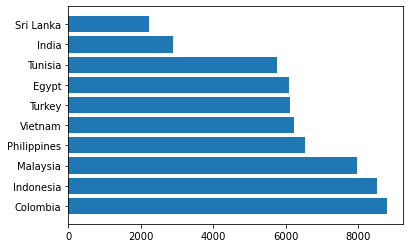

In [93]:
print("Top 10 Cheapest locations to hire IT Professionals")
tempdf = Finaldf
tempdf = tempdf[tempdf["Job_Level"]=="Professional IC"]
tempdf = tempdf[tempdf["Job_Family_Group"]=="Information Technology"]
tempdf = tempdf.sort_values(by="Market midpoint USD",ascending=True)
tempdf = tempdf.iloc[:10]
tempdf = tempdf.sort_values("Market midpoint USD",ascending=False)
pyplot.barh(y=tempdf["Country"],width=tempdf["Market midpoint USD"])
pyplot.show()

Top 10 Cheapest locations to hire IT Directors


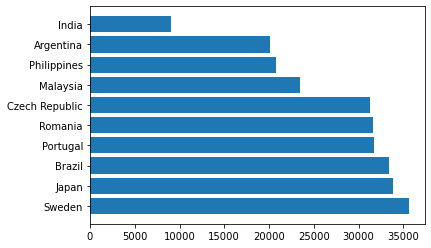

In [94]:
print("Top 10 Cheapest locations to hire IT Directors")
tempdf = Finaldf
tempdf = tempdf[tempdf["Job_Level"]=="Director"]
tempdf = tempdf[tempdf["Job_Family_Group"]=="Information Technology"]
tempdf = tempdf.sort_values(by="Market midpoint USD",ascending=True)
tempdf = tempdf.iloc[:10]
tempdf = tempdf.sort_values("Market midpoint USD",ascending=False)
pyplot.barh(y=tempdf["Country"],width=tempdf["Market midpoint USD"])
pyplot.show()

IT Professionals: Market size vs Price


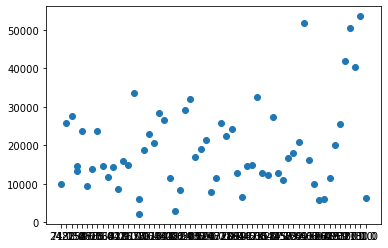

In [97]:
print("IT Professionals: Market size vs Price")
tempdf = Finaldf
tempdf = tempdf[tempdf["Job_Level"]=="Professional IC"]
tempdf = tempdf[tempdf["Job_Family_Group"]=="Information Technology"]
pyplot.scatter(tempdf["Comp_Employee_Count"],tempdf["Market midpoint USD"])
pyplot.show()

IT: Directors vs Professional IC Global talent pool


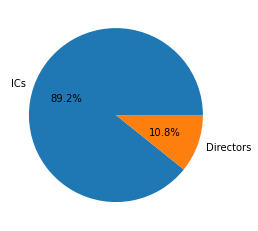

In [106]:
print("IT: Directors vs Professional IC Global talent pool")
tempdf = Finaldf
tempdf = tempdf[tempdf["Job_Family_Group"]=="Information Technology"]
tempdfic = tempdf[tempdf["Job_Level"]=="Professional IC"]
tempdfmgr = tempdf[tempdf["Job_Level"]=="Director"]
ics = pandas.to_numeric(tempdfic["Comp_Employee_Count"]).sum()
mgrs = pandas.to_numeric(tempdfmgr["Comp_Employee_Count"]).sum()
pyplot.pie([ics,mgrs],labels=["ICs","Directors"],autopct='%1.1f%%')
pyplot.show()

IT: Directors vs Professional IC India talent pool


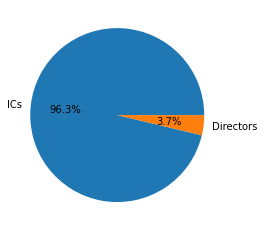

In [107]:
# As India showed up as cheaper in both ICs and Directors, calculating the talent pool ratio in India
print("IT: Directors vs Professional IC India talent pool")
tempdf = Finaldf
tempdf = tempdf[tempdf["Country"]=="India"]
tempdf = tempdf[tempdf["Job_Family_Group"]=="Information Technology"]
tempdfic = tempdf[tempdf["Job_Level"]=="Professional IC"]
tempdfmgr = tempdf[tempdf["Job_Level"]=="Director"]
ics = pandas.to_numeric(tempdfic["Comp_Employee_Count"]).sum()
mgrs = pandas.to_numeric(tempdfmgr["Comp_Employee_Count"]).sum()
pyplot.pie([ics,mgrs],labels=["ICs","Directors"],autopct='%1.1f%%')
pyplot.show()

### Learnings and ethical implications summary

I had the opportunity to work on a challenging task that involved integrating data from multiple sources: a plain text file, a web page, and an API. This project not only provided me with valuable hands-on experience but also taught me important lessons about data integration, cleaning, and analysis.

One of the key takeaways from this project was the significance of data preprocessing and cleaning. Working with data from different sources meant encountering inconsistencies, missing values, and varying formats. I learned to employ various techniques such as data parsing, text manipulation, and handling missing values to ensure the data was in a consistent and usable format. This step was crucial as it laid the foundation for the subsequent analysis and insights.

Furthermore, integrating data from diverse sources exposed me to different data retrieval methods. I had to leverage Python libraries and web scraping techniques to extract data from web pages, while also utilizing APIs to access real-time data. This experience enhanced my understanding of data retrieval techniques and expanded my skill set in working with different data sources.

Overall, this project provided me with a deeper understanding of the complexities involved in integrating, cleaning, and analyzing data from diverse sources. It emphasized the significance of data preprocessing, retrieval techniques, and harmonization for obtaining actionable insights. I also developed skills in Python programming, web scraping, and API integration, which are valuable assets in the field of data science. This project was a valuable learning experience that has further strengthened my capabilities in working with diverse data sources and extracting meaningful insights for informed decision-making.

For ethical implications, I would be careful on how to present this to managers. I wouldn't want them to move all IT jobs from the US to India, for example, so I would also include other factors into a presentation like this, such as time-zone friendly places, and Hofstede's dimensions of culture for a measure of cultural fitness.

### Human readable dataset - Final

In [68]:
Finaldf.head()

,Effective_Date,Country_and_Region,Currency,Job_Family_Group,Job_Level,Country,Region,Comp_50th_Percentile,Comp_Employee_Count,Comp_Company_Count,Inflation,Rate,Market midpoint USD
0,01/01/2023,Algeria,DZD,Corporate & Business Services,Professional IC,Algeria,,2743053.0,5.0,3.0,0.0975,136.420675,7355.924771
1,01/01/2023,Algeria,DZD,Customer Service / Support,Professional IC,Algeria,,2339400.0,40.0,3.0,0.0975,136.420675,6273.466247
2,01/01/2023,Algeria,DZD,Sales,Professional IC,Algeria,,4734486.0,13.0,3.0,0.0975,136.420675,12696.263195
3,01/01/2023,Algeria,DZD,Engineering,Professional IC,Algeria,,3016092.0,16.0,3.0,0.0975,136.420675,8088.121467
4,01/01/2023,Argentina,ARS,Corporate & Business Services,Director,Argentina,,7243611.0,8.0,3.0,1.065,234.325699,21278.156541
